In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.info()
df = df.drop('Id',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


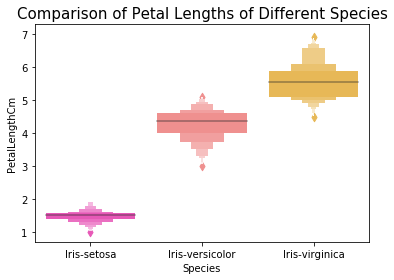

In [49]:
sns.boxenplot('Species','PetalLengthCm',data=df,palette='spring')
plt.title('Comparison of Petal Lengths of Different Species',fontsize=15)
plt.show()

There is a noticeable difference in the petal lengths of the different species. Setosa has the shortest petals at less than 2cm. Versicolor has longers petals but the maximum length they reach is 5cm, Virginica has the longest petals.

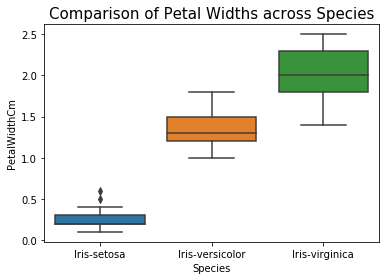

In [51]:
sns.boxplot(df['Species'],df['PetalWidthCm'])
plt.title('Comparison of Petal Widths across Species',fontsize=15)
plt.show()

Virginica has the widest petals mostly concentrated around 2cm. Versicolor has the second largest petals concentrated between 1cm and 1.5cm. Setosa has the thinnest petals and they are less than 0.5cm wide. 

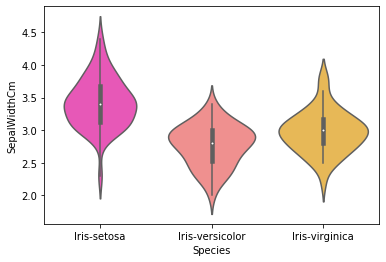

In [37]:
sns.violinplot('Species','SepalWidthCm',data=df,palette='spring')

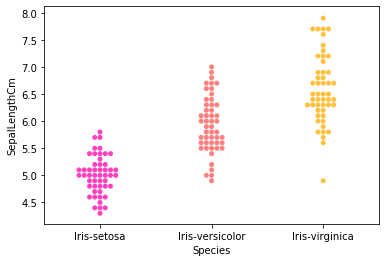

In [44]:
sns.swarmplot('Species','SepalLengthCm',data=df,palette='spring')

In [8]:
features = ['SepalLengthCm','PetalLengthCm','PetalWidthCm','SepalWidthCm']
x = df[features]
y = df['Species']


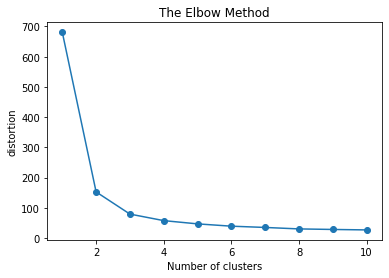

In [9]:
distortion = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    distortion.append(kmeans.inertia_)
plt.plot(range(1,11),distortion,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

Petal width and petal length are the two factors that are very different across iris species 

In [10]:
km = KMeans(n_clusters=3)
model = km.fit(x)
centres = model.cluster_centers_

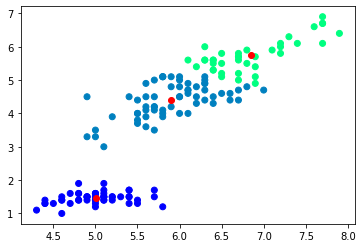

In [16]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=model.labels_, cmap='winter')
plt.scatter(centres[:,0] ,centres[:,1], color='red')